**Importing Python Libraries**

In [ ]:
import numpy as np
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
import random as rn
import math

**Data Importing**

In [ ]:
df = pd.read_csv('FUDS0.csv')
df.head()

,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),A,SOC,SOC%
0,0.000000,3.471265,0.000000,0.0,0.0,1.0,100.0
1,0.999713,3.619649,0.002781,0.0,0.0,1.0,100.0
2,0.999893,3.625805,0.005563,0.0,0.0,1.0,100.0
3,0.999893,3.630341,0.008344,0.0,0.0,1.0,100.0
4,0.999713,3.633742,0.011126,0.0,0.0,1.0,100.0


In [ ]:
X =df.drop(['Charge_Capacity(Ah)','Discharge_Capacity(Ah)', 'A', 'SOC', 'SOC%'], axis=1)
X = X.dropna()
print(X)

      Current(A)  Voltage(V)
0       0.000000    3.471265
1       0.999713    3.619649
2       0.999893    3.625805
3       0.999893    3.630341
4       0.999713    3.633742
...          ...         ...
6855    0.080902    3.617381
6856    0.202547    3.630826
6857   -0.911867    3.515164
6858   -1.073460    3.496536
6859   -0.805518    3.523264

[6860 rows x 2 columns]


**Moving Average Filter for Input Quantities**

In [ ]:
L=7200 #L-point filter
b = (np.ones(L))/L #numerator co-effs of filter transfer function
a = 1  #denominator co-effs of filter transfer function
Xf = signal.lfilter(b,a,X) #filter output using lfilter function
print(Xf)

[[ 0.          0.00048212]
 [ 0.00013885  0.00064158]
 [ 0.00013887  0.00064246]
 ...
 [-0.00012665  0.00036157]
 [-0.00014909  0.00033654]
 [-0.00011188  0.00037746]]


             0         1
0     0.000000  0.000482
1     0.000139  0.000642
2     0.000139  0.000642
3     0.000139  0.000643
4     0.000139  0.000644
...        ...       ...
6855  0.000011  0.000514
6856  0.000028  0.000532
6857 -0.000127  0.000362
6858 -0.000149  0.000337
6859 -0.000112  0.000377

[6860 rows x 2 columns]


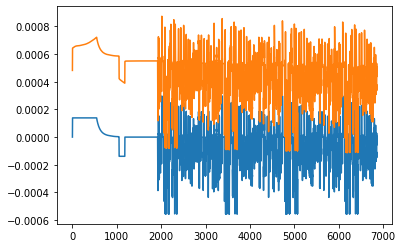

In [ ]:
Xf1 = pd.DataFrame(Xf)
print(Xf1)
plt.plot(Xf1)

**Data Normalization**

             0         1
0     0.302711  0.206010
1     0.628256  0.529074
2     0.628314  0.530857
3     0.628314  0.532133
4     0.628256  0.533040
...        ...       ...
6855  0.329056  0.269891
6856  0.368668  0.307904
6857  0.005772 -0.038228
6858 -0.046849 -0.088940
6859  0.040403 -0.006023

[6860 rows x 2 columns]


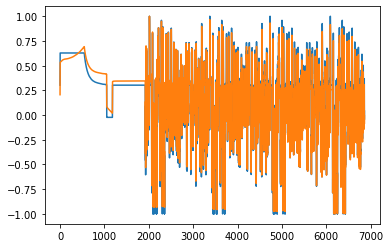

In [ ]:
df_min_max_scaled = Xf1.copy()  
# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = -1 + 2*(df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
    Xn = df_min_max_scaled.copy()
# view normalized data
print(Xn)
plt.plot(Xn)

In [ ]:
Y =df.drop(['Current(A)','Voltage(V)','Charge_Capacity(Ah)','Discharge_Capacity(Ah)','A','SOC%'], axis=1)
Y = Y.dropna()
print(Y)

               SOC
0     1.000000e+00
1     1.000000e+00
2     1.000000e+00
3     1.000000e+00
4     1.000000e+00
...            ...
6855  5.630140e-04
6856  5.630140e-04
6857  4.233660e-04
6858  1.934740e-04
6859  3.634560e-07

[6860 rows x 1 columns]


**Dataset Splitting into Training and Testing Data**

In [ ]:
from sklearn.model_selection import train_test_split
train_Xn, test_Xn, train_Y, test_Y = train_test_split(Xn, Y,train_size=0.7,test_size=0.3)
print("Labels for training and testing data")
print(train_Y)
print(test_Y)
print(train_Xn)
print(test_Xn)

Labels for training and testing data
           SOC
5026  0.251566
1141  0.798740
5162  0.232192
609   1.000000
4568  0.336466
...        ...
3113  0.535720
4606  0.332614
3235  0.523257
3000  0.548290
2489  0.608726

[4802 rows x 1 columns]
           SOC
3858  0.417140
4184  0.376516
5673  0.171638
1641  0.712686
3157  0.533659
...        ...
2301  0.635997
4464  0.346082
2131  0.667218
6233  0.088067
3769  0.427661

[2058 rows x 1 columns]
             0         1
5026 -0.622279 -0.613257
1141 -0.023000  0.037330
5162  0.302628  0.265789
609   0.453400  0.541256
4568  0.302687  0.279105
...        ...       ...
3113  0.289444  0.293962
4606  0.398201  0.368204
3235 -0.060092 -0.043177
3000 -0.345170 -0.310487
2489  0.010811  0.039014

[4802 rows x 2 columns]
             0         1
3858  0.197035  0.186350
4184  0.310949  0.289344
5673 -0.206938 -0.226912
1641  0.302711  0.345084
3157 -0.416191 -0.376871
...        ...       ...
2301 -0.252996 -0.207545
4464  0.211860  0.190181
213

**Sigmoid Function**

In [ ]:
# defining the Sigmoid Function
def sigmoid (Xn):
    return 1/(1 + np.exp(-Xn))

# derivative of Sigmoid Function
def derivatives_sigmoid(Xn):
    return Xn * (1 - Xn)

**Initialization of Parameters**

In [ ]:
#Weights
w0 = 2*np.random.random((2, 3)) - 1 #for input   - 2 inputs, 1 outputs
w1 = 2*np.random.random((3, 3)) - 1 #for layer 1 - 2 inputs, 1 outputs
w2 = 2*np.random.random((3, 1)) - 1 #for layer 2 - 2 inputs, 1 outputs
#learning rate
n = 0.1
epoch = 500
hiddenlayer_neurons = 3
hiddenlayer = 2

In [ ]:
errors = []

**Feed-Forward Backpropagation**

In [ ]:
for i in range (epoch):

    #Feed forward network
    layer0 = train_Xn    #Input Layer
    layer1 = sigmoid(np.dot(layer0, w0))  #Hidden Layer 1
    layer2 = sigmoid(np.dot(layer1, w1))  #Hidden Layer 2
    layer3 = sigmoid(np.dot(layer2, w2))  #Output Layer 

    #Back propagation using gradient descent
    layer3_error = train_Y - layer3
    layer3_delta = layer3_error * derivatives_sigmoid(layer3)

    layer2_error = layer3_delta.dot (w2.T)
    layer2_delta = layer2_error * derivatives_sigmoid(layer2)

    layer1_error = layer2_delta.dot (w1.T)
    layer1_delta = layer1_error * derivatives_sigmoid(layer1)

    w2 += layer2.T.dot(layer3_delta) * n 
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n

    error = np.mean(np.abs(layer3_error))
    errors.append(error)

**Calculation of Accuracy of Training Model**

In [ ]:
accuracy_training = (1 - error) * 100

In [ ]:
print ("Training Accuracy of the model   " + str (round(accuracy_training,2)) + "%")

Training Accuracy of the model   SOC    80.3
dtype: float64%


**SOC Graph**

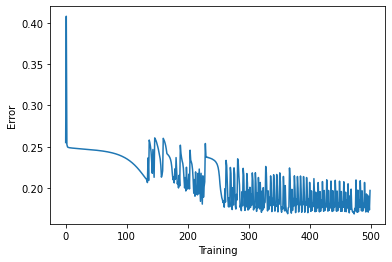

In [ ]:
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()

**Mean Square Error Calculation**

In [ ]:
MSE = np.mean((train_Y - layer3)**2) # Mean Squared Error
print(MSE)
errors.append(MSE)

SOC    0.065034
dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(train_Y,layer3)

0.06503350791383633

**Absolute Error Calculation**

In [ ]:
print(error) # Absolute Error Value

SOC    0.19697
dtype: float64


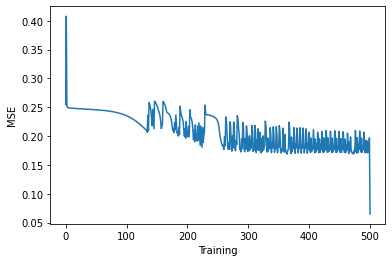

In [ ]:
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('MSE')# SOC 
plt.show()

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(train_Y,layer3)
layer2n = linear_regressor.predict(train_Y)

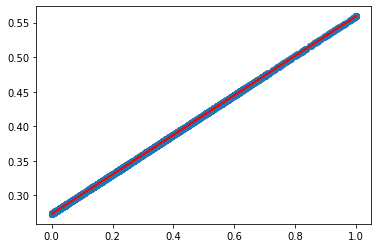

In [ ]:
plt.scatter(train_Y,layer2n)
plt.plot(train_Y, layer2n, color='red')
plt.show()

**Testing Part**

In [ ]:
#Testing
layer0t = test_Xn

layer1t = sigmoid(np.dot(layer0t, w0))
layer2t = sigmoid(np.dot(layer1t, w1))
layer3t = sigmoid(np.dot(layer2t, w2))

layer3t_error = test_Y - layer3t
error = np.mean(np.abs(layer3t_error))
errors.append(error)

**Testing Accuracy Calculation**

In [ ]:
accuracy_testing = (1 - error) * 100

In [ ]:
print ("Testing Accuracy of the model   " + str (round(accuracy_testing,2)) + "%")

Testing Accuracy of the model   SOC    82.6
dtype: float64%


**SOC error Graph**

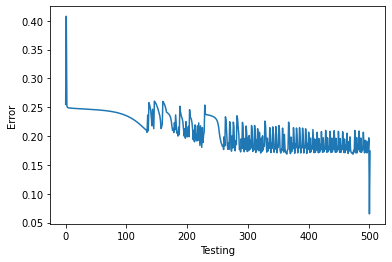

In [ ]:
plt.plot(errors)
plt.xlabel('Testing')
plt.ylabel('Error')
plt.show()

**Mean Square Error**

In [ ]:
MSE_T = np.mean((test_Y - layer3t)**2) # Mean Squared Error
print(MSE_T)
errors.append(MSE_T)

SOC    0.058194
dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_Y,layer3t)

0.05819381765135647

**Mean Absolute Error**

In [ ]:
print(error) # Absolute Error Value

SOC    0.173955
dtype: float64


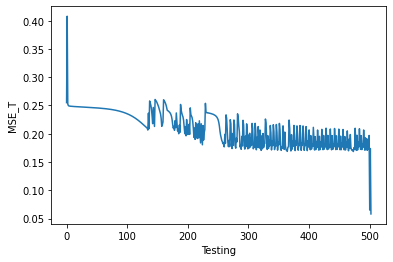

In [ ]:
plt.plot(errors)
plt.xlabel('Testing')
plt.ylabel('MSE_T')# SOC 
plt.show()